<a href="https://colab.research.google.com/github/split56/MLn/blob/main/heartDPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('heart_2022_Key_indicators.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [63]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [64]:
df.shape

(319795, 18)

In [65]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [66]:
df['HeartDisease'].value_counts()

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

highly unbalanced, under-sampling


In [67]:
pos_heart = df[df['HeartDisease']=='Yes']
neg_heart = df[df['HeartDisease']=='No']

In [68]:
print(pos_heart.shape,neg_heart.shape)

(27373, 18) (292422, 18)


In [69]:
neg_heart_sample = neg_heart.sample(27373)
neg_heart_sample.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
303342,No,39.06,Yes,No,No,30.0,4.0,Yes,Female,50-54,White,Yes,No,Fair,8.0,Yes,No,No
131964,No,26.61,Yes,No,No,0.0,10.0,No,Male,30-34,White,No,No,Very good,6.0,No,No,No
226985,No,32.49,No,No,No,0.0,1.0,No,Male,75-79,White,Yes,No,Good,7.0,No,No,No
302241,No,30.18,Yes,No,No,15.0,30.0,No,Female,60-64,White,No,No,Good,5.0,Yes,No,No
301856,No,30.40,No,No,No,0.0,0.0,No,Male,30-34,White,No,Yes,Good,9.0,No,No,No


In [70]:
new_df = pd.concat([pos_heart,neg_heart_sample],axis = 0)

In [71]:
new_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
42,Yes,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
43,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No


In [72]:
new_df['Race'].unique()

array(['Black', 'White', 'Other', 'American Indian/Alaskan Native',
       'Asian', 'Hispanic'], dtype=object)

In [73]:
new_df['AgeCategory'].unique()

array(['75-79', '60-64', '80 or older', '70-74', '55-59', '65-69',
       '50-54', '45-49', '35-39', '40-44', '25-29', '30-34', '18-24'],
      dtype=object)

In [74]:
new_df['GenHealth'].unique()


array(['Fair', 'Poor', 'Good', 'Very good', 'Excellent'], dtype=object)

In [75]:
col_to_con = ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Diabetic','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']
new_df['Sex'] = [0 if gender == 'Male' else 1 for gender in new_df['Sex']]

for col in col_to_con:
  new_df[col] = [0 if c == 'No' else 1 for c in new_df[col]]


new_df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,1,28.87,1,0,0,6.0,0.0,1,1,75-79,Black,0,0,Fair,12.0,0,0,0
10,1,34.30,1,0,0,30.0,0.0,1,0,60-64,White,1,0,Poor,15.0,1,0,0
35,1,32.98,1,0,1,10.0,0.0,1,0,75-79,White,1,1,Poor,4.0,0,0,1
42,1,25.06,0,0,0,0.0,0.0,1,1,80 or older,White,1,0,Good,7.0,0,0,1
43,1,30.23,1,0,0,6.0,2.0,1,1,75-79,White,1,1,Fair,8.0,0,1,0


In [76]:
dum_col = ['AgeCategory','Race','GenHealth']

for col in dum_col:
  new_df = pd.get_dummies(new_df, columns=[col], drop_first=True)

new_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
5,1,28.87,1,0,0,6.0,0.0,1,1,0,...,False,False,True,False,False,False,True,False,False,False
10,1,34.30,1,0,0,30.0,0.0,1,0,1,...,False,False,False,False,False,True,False,False,True,False
35,1,32.98,1,0,1,10.0,0.0,1,0,1,...,False,False,False,False,False,True,False,False,True,False
42,1,25.06,0,0,0,0.0,0.0,1,1,1,...,True,False,False,False,False,True,False,True,False,False
43,1,30.23,1,0,0,6.0,2.0,1,1,1,...,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7293,0,25.80,0,1,0,0.0,0.0,0,0,0,...,False,False,False,True,False,False,False,False,False,True
128664,0,30.13,0,0,0,0.0,15.0,0,0,0,...,False,False,False,False,False,True,False,True,False,False
239563,0,23.11,1,0,0,0.0,0.0,0,0,0,...,False,False,False,False,False,True,False,False,False,True
181475,0,39.05,1,0,0,0.0,0.0,0,0,0,...,False,False,False,False,False,True,False,True,False,False


EDA

In [77]:
new_df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'Diabetic',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'AgeCategory_25-29', 'AgeCategory_30-34',
       'AgeCategory_35-39', 'AgeCategory_40-44', 'AgeCategory_45-49',
       'AgeCategory_50-54', 'AgeCategory_55-59', 'AgeCategory_60-64',
       'AgeCategory_65-69', 'AgeCategory_70-74', 'AgeCategory_75-79',
       'AgeCategory_80 or older', 'Race_Asian', 'Race_Black', 'Race_Hispanic',
       'Race_Other', 'Race_White', 'GenHealth_Fair', 'GenHealth_Good',
       'GenHealth_Poor', 'GenHealth_Very good'],
      dtype='object')

In [78]:
cat_cols = ['Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','Diabetic','PhysicalActivity','Asthma','KidneyDisease','SkinCancer','AgeCategory_25-29', 'AgeCategory_30-34',
       'AgeCategory_35-39', 'AgeCategory_40-44', 'AgeCategory_45-49',
       'AgeCategory_50-54', 'AgeCategory_55-59', 'AgeCategory_60-64',
       'AgeCategory_65-69', 'AgeCategory_70-74', 'AgeCategory_75-79',
       'AgeCategory_80 or older', 'Race_Asian', 'Race_Black', 'Race_Hispanic',
       'Race_Other', 'Race_White', 'GenHealth_Fair', 'GenHealth_Good',
       'GenHealth_Poor', 'GenHealth_Very good']

n_rols = 11
n_cols = 3

fig,ax = plt.subplots(n_rols,n_cols,figsize=(n_rols*5,n_cols*60))

for r in range(0,n_rols):
  for c in range(0,n_cols):
    i = r*n_cols + c
    if i < len(cat_cols):
      ax_i = ax[r,c]
      sns.countplot(data = new_df, x = cat_cols[i],hue = 'HeartDisease', ax = ax_i)
      ax_i.set_title(f'Figure {i+1} : HeartDisease rate vs {cat_cols[i]}')
      ax_i.legend(title='',loc='upper right', labels=['Not HeartDisease','HeartDisease'])


plt.show()

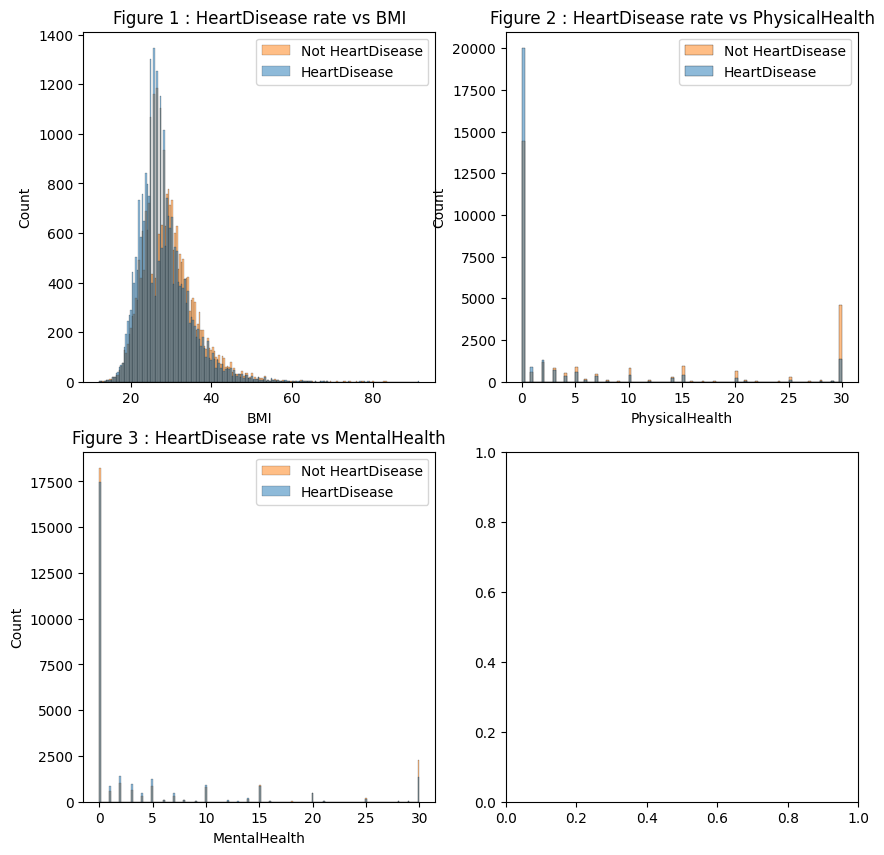

In [82]:
num_cols = ['BMI','PhysicalHealth','MentalHealth']

n_rols = 2
n_cols = 2

fig,ax = plt.subplots(n_rols,n_cols,figsize=(n_rols*5,n_cols*5))

for r in range(0,n_rols):
  for c in range(0,n_cols):
    i = r*n_cols + c
    if i < len(num_cols):
      ax_i = ax[r,c]
      sns.histplot(data = new_df, x = num_cols[i],hue = 'HeartDisease', ax = ax_i)
      ax_i.set_title(f'Figure {i+1} : HeartDisease rate vs {num_cols[i]}')
      ax_i.legend(title='',loc='upper right', labels=['Not HeartDisease','HeartDisease'])


plt.show()

In [ ]:
new_df.columns

In [90]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [85]:
X = new_df.drop(columns = ['HeartDisease'],axis = 1)
y = new_df['HeartDisease']

In [96]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state = 42)

In [87]:
print(X_train.shape,X_test.shape,X.shape)

(43796, 35) (10950, 35) (54746, 35)


In [88]:
print(y_train.shape,y_test.shape,y.shape)

(43796,) (10950,) (54746,)


In [91]:
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()


In [92]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [94]:
models = [log_reg, decision_tree, random_forest]
for model in models:
    scores = cross_val_score(model, X_test, y_test, cv=kf, scoring='accuracy')
    print(f"{model.__class__.__name__}: Mean Accuracy = {scores.mean()}, Standard Deviation = {scores.std()}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression: Mean Accuracy = 0.7663013698630138, Standard Deviation = 0.00433573606227184
DecisionTreeClassifier: Mean Accuracy = 0.6645662100456621, Standard Deviation = 0.007763094260220436
RandomForestClassifier: Mean Accuracy = 0.7395433789954338, Standard Deviation = 0.0037387195416362824
